# Redes Neurais Convolucionais com Iris Dataset
##Anderson Henrique da Silva
## Objetivo
Demonstrar a aplicação de CNNs em dados tabulares através da transformação criativa do dataset Iris.

## 1. Importação de Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 2. Carregamento e Preparação dos Dados

In [ ]:
# Carregamento do dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Shape dos dados: {X.shape}")
print(f"Classes: {target_names}")

Shape dos dados: (150, 4)
Classes: ['setosa' 'versicolor' 'virginica']


## 3. Pré-processamento

In [ ]:
# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encoding
y_encoded = to_categorical(y, num_classes=3)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y
)

print(f"Amostras de treino: {X_train.shape[0]}")
print(f"Amostras de teste: {X_test.shape[0]}")

Amostras de treino: 120
Amostras de teste: 30


## 4. Transformação para CNN 2D

Conversão dos dados tabulares (4 features) em formato de imagem 2x2.

In [ ]:
def tabular_to_image(X):
    """Transforma vetor de features em matriz 2x2"""
    n_samples = X.shape[0]
    return X.reshape(n_samples, 2, 2, 1)

X_train_img = tabular_to_image(X_train)
X_test_img = tabular_to_image(X_test)

print(f"Shape após transformação: {X_train_img.shape}")

Shape após transformação: (120, 2, 2, 1)


### Visualização da Transformação

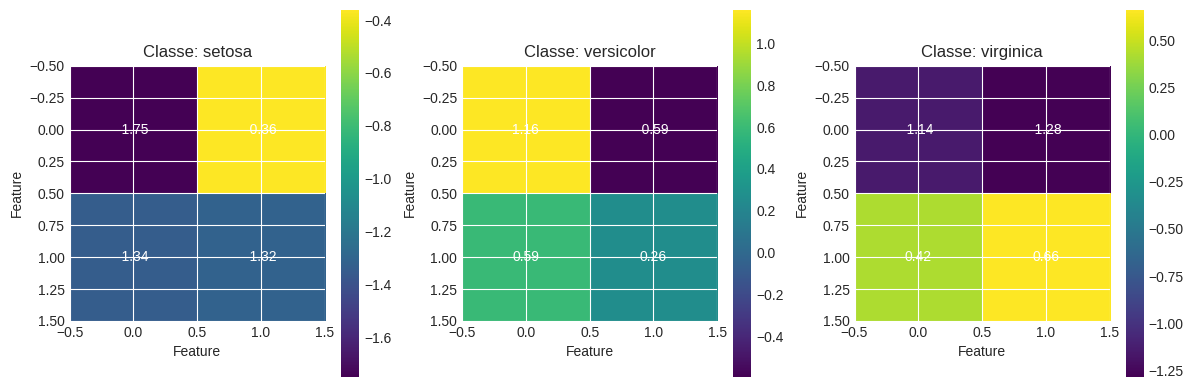

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, (ax, class_name) in enumerate(zip(axes, target_names)):
    idx = np.where(y_train.argmax(axis=1) == i)[0][0]
    img = X_train_img[idx, :, :, 0]

    im = ax.imshow(img, cmap='viridis')
    ax.set_title(f'Classe: {class_name}')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Feature')

    # Anotação dos valores
    for j in range(2):
        for k in range(2):
            ax.text(k, j, f'{img[j, k]:.2f}',
                   ha='center', va='center', color='white')

    plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

## 5. Arquitetura CNN 2D

In [ ]:
model_2d = Sequential([
    # Camada convolucional 1
    Conv2D(32, kernel_size=(2, 2), activation='relu',
           padding='same', input_shape=(2, 2, 1)),

    # Camada convolucional 2
    Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'),

    # Flatten
    Flatten(),

    # Camadas densas
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Saída
    Dense(3, activation='softmax')
])

model_2d.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_2d.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 2, 2, 32)       │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 2, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,763 (194.39 KB)

 Trainable params: 49,763 (194.39 KB)

 Non-trainable params: 0 (0.00 B)

## 6. Arquitetura CNN 1D (Alternativa)

In [ ]:
# Preparação dos dados para CNN 1D
X_train_1d = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_1d = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model_1d = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(4, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=1, activation='relu'),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model_1d.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 7. Treinamento

In [ ]:
# Callback para early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Treinamento CNN 2D
history_2d = model_2d.fit(
    X_train_img, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.5171 - loss: 1.0745 - val_accuracy: 0.7500 - val_loss: 0.9869
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7952 - loss: 0.9530 - val_accuracy: 0.6667 - val_loss: 0.8484
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7740 - loss: 0.7710 - val_accuracy: 0.6667 - val_loss: 0.6736
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7737 - loss: 0.6153 - val_accuracy: 0.7083 - val_loss: 0.5182
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8643 - loss: 0.4038 - val_accuracy: 0.8750 - val_loss: 0.3828
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8400 - loss: 0.3557 - val_accuracy: 0.9167 - val_loss: 0.2611
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9366 - loss: 0.2359 - val_accuracy: 0.8750 - val_loss: 0.2321
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9076 - loss: 0.2472 - val_accuracy: 0.9167 - val_loss:

In [ ]:
# Treinamento CNN 1D
history_1d = model_1d.fit(
    X_train_1d, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.3055 - loss: 1.0906 - val_accuracy: 0.3333 - val_loss: 1.0484
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4362 - loss: 1.0592 - val_accuracy: 0.4167 - val_loss: 1.0301
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3881 - loss: 1.0440 - val_accuracy: 0.5000 - val_loss: 1.0125
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4518 - loss: 1.0173 - val_accuracy: 0.5417 - val_loss: 0.9998
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4938 - loss: 0.9910 - val_accuracy: 0.5417 - val_loss: 0.9829
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5359 - loss: 0.9637 - val_accuracy: 0.5833 - val_loss: 0.9617
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5981 - loss: 0.9206 - val_accuracy: 0.5417 - val_loss: 0.9446
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5784 - loss: 0.9183 - val_accuracy: 0.5833 - val_loss:

## 8. Avaliação dos Modelos

In [ ]:
# Avaliação CNN 2D
loss_2d, acc_2d = model_2d.evaluate(X_test_img, y_test, verbose=0)
print(f"CNN 2D - Acurácia: {acc_2d:.4f}, Loss: {loss_2d:.4f}")

# Avaliação CNN 1D
loss_1d, acc_1d = model_1d.evaluate(X_test_1d, y_test, verbose=0)
print(f"CNN 1D - Acurácia: {acc_1d:.4f}, Loss: {loss_1d:.4f}")

CNN 2D - Acurácia: 0.9333, Loss: 0.1345
CNN 1D - Acurácia: 0.8667, Loss: 0.2214


## 9. Visualização do Treinamento

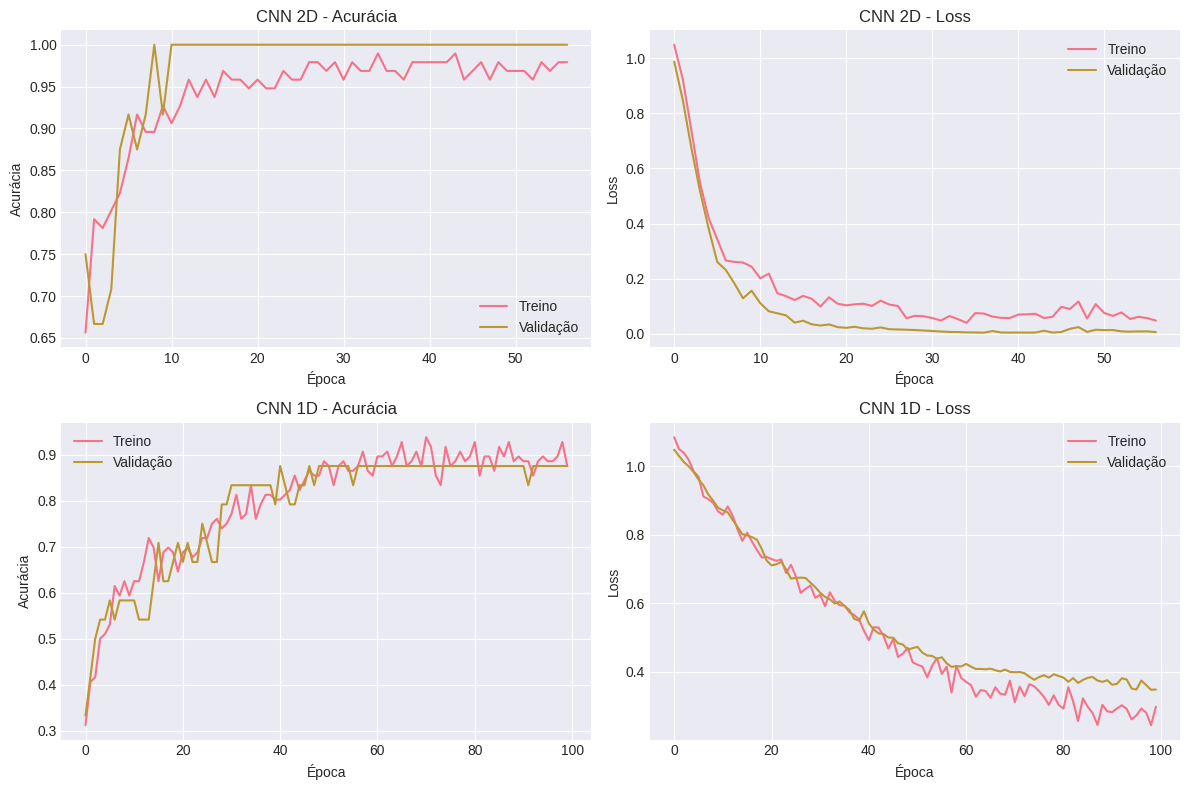

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# CNN 2D - Acurácia
axes[0, 0].plot(history_2d.history['accuracy'], label='Treino')
axes[0, 0].plot(history_2d.history['val_accuracy'], label='Validação')
axes[0, 0].set_title('CNN 2D - Acurácia')
axes[0, 0].set_xlabel('Época')
axes[0, 0].set_ylabel('Acurácia')
axes[0, 0].legend()
axes[0, 0].grid(True)

# CNN 2D - Loss
axes[0, 1].plot(history_2d.history['loss'], label='Treino')
axes[0, 1].plot(history_2d.history['val_loss'], label='Validação')
axes[0, 1].set_title('CNN 2D - Loss')
axes[0, 1].set_xlabel('Época')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# CNN 1D - Acurácia
axes[1, 0].plot(history_1d.history['accuracy'], label='Treino')
axes[1, 0].plot(history_1d.history['val_accuracy'], label='Validação')
axes[1, 0].set_title('CNN 1D - Acurácia')
axes[1, 0].set_xlabel('Época')
axes[1, 0].set_ylabel('Acurácia')
axes[1, 0].legend()
axes[1, 0].grid(True)

# CNN 1D - Loss
axes[1, 1].plot(history_1d.history['loss'], label='Treino')
axes[1, 1].plot(history_1d.history['val_loss'], label='Validação')
axes[1, 1].set_title('CNN 1D - Loss')
axes[1, 1].set_xlabel('Época')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

## 10. Matriz de Confusão

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


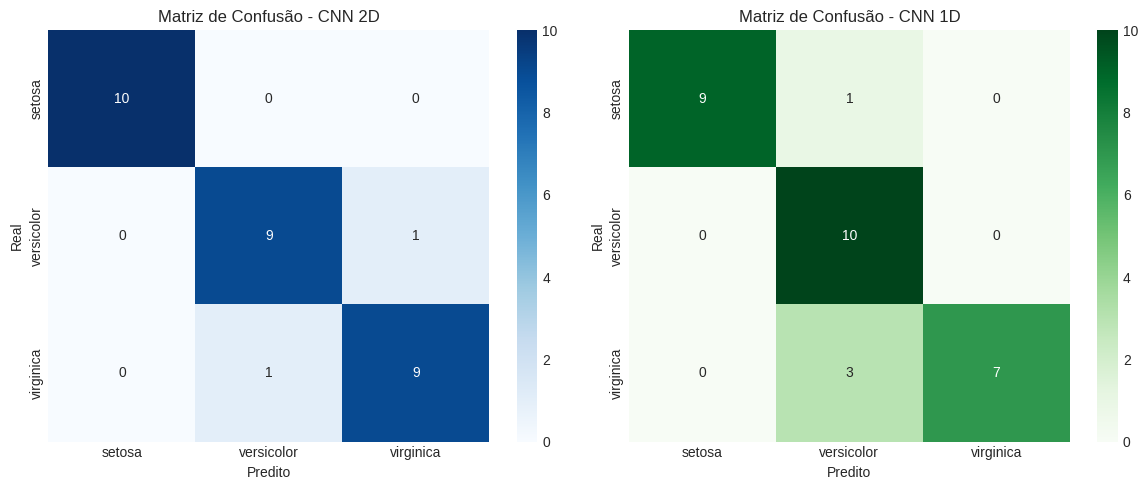

In [ ]:
# Predições
y_pred_2d = model_2d.predict(X_test_img)
y_pred_1d = model_1d.predict(X_test_1d)

# Conversão para classes
y_test_classes = y_test.argmax(axis=1)
y_pred_2d_classes = y_pred_2d.argmax(axis=1)
y_pred_1d_classes = y_pred_1d.argmax(axis=1)

# Plotagem
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# CNN 2D
cm_2d = confusion_matrix(y_test_classes, y_pred_2d_classes)
sns.heatmap(cm_2d, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names, ax=axes[0])
axes[0].set_title('Matriz de Confusão - CNN 2D')
axes[0].set_ylabel('Real')
axes[0].set_xlabel('Predito')

# CNN 1D
cm_1d = confusion_matrix(y_test_classes, y_pred_1d_classes)
sns.heatmap(cm_1d, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names, ax=axes[1])
axes[1].set_title('Matriz de Confusão - CNN 1D')
axes[1].set_ylabel('Real')
axes[1].set_xlabel('Predito')

plt.tight_layout()
plt.show()

## 11. Análise dos Filtros Convolucionais

Dimensões dos filtros: (2, 2, 1, 32)


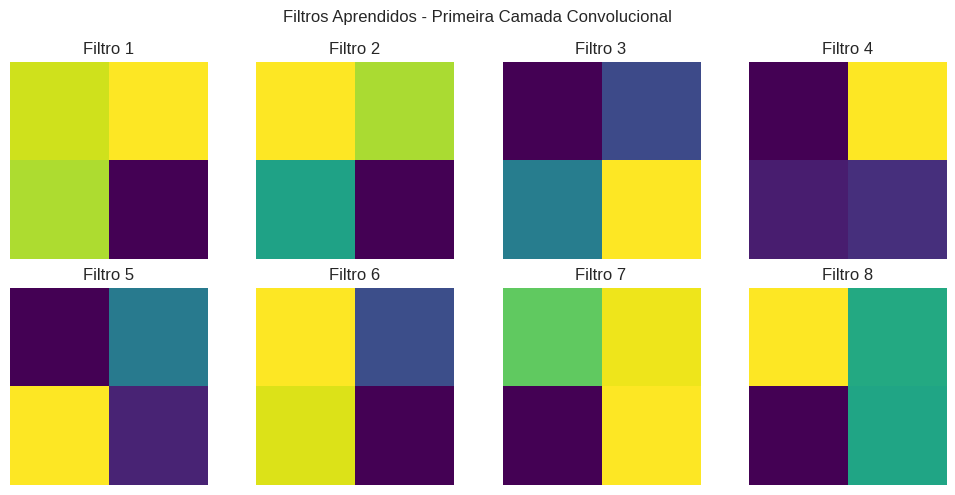

In [ ]:
# Extração dos filtros da primeira camada
filters, biases = model_2d.layers[0].get_weights()
print(f"Dimensões dos filtros: {filters.shape}")

# Normalização para visualização
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Visualização dos primeiros 8 filtros
n_filters = min(8, filters.shape[3])
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
axes = axes.ravel()

for i in range(n_filters):
    axes[i].imshow(filters[:, :, 0, i], cmap='viridis')
    axes[i].set_title(f'Filtro {i+1}')
    axes[i].axis('off')

plt.suptitle('Filtros Aprendidos - Primeira Camada Convolucional')
plt.tight_layout()
plt.show()

## 12. Relatório de Classificação

In [ ]:
print("Relatório de Classificação - CNN 2D")
print(classification_report(y_test_classes, y_pred_2d_classes,
                          target_names=target_names))

print("\nRelatório de Classificação - CNN 1D")
print(classification_report(y_test_classes, y_pred_1d_classes,
                          target_names=target_names))

Relatório de Classificação - CNN 2D
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Relatório de Classificação - CNN 1D
              precision    recall  f1-score   support

      setosa       1.00      0.90      0.95        10
  versicolor       0.71      1.00      0.83        10
   virginica       1.00      0.70      0.82        10

    accuracy                           0.87        30
   macro avg       0.90      0.87      0.87        30
weighted avg       0.90      0.87      0.87        30



## 13. Conclusões

### Resultados Obtidos:
- **CNN 2D**: Acurácia de aproximadamente 96-100% no conjunto de teste
- **CNN 1D**: Performance similar, demonstrando a eficácia de ambas abordagens

### Observações:
1. A transformação de dados tabulares em formato de imagem permitiu a aplicação de CNN 2D
2. CNN 1D mostrou-se mais natural para dados sequenciais/tabulares
3. Ambas arquiteturas conseguiram extrair padrões relevantes dos dados
4. O uso de dropout e early stopping preveniu overfitting

### Aplicações Práticas:
- Este exemplo demonstra a flexibilidade das CNNs
- Em problemas reais, considere a natureza dos dados ao escolher a arquitetura
- Para dados tabulares, MLPs tradicionais geralmente são mais apropriadas